In [5]:
using Pkg
#Pkg.add("Distributions")
using Random, Distributions
using PyPlot
using Optim

In [23]:
function gen_support(t) 
    result = zeros(2^(2*t),t,2)
    for i=1:2^(2*t)
        i_copy = i
        binary = zeros(2*t)
        for digit=1:2*t
            if mod(i_copy,2) > 0
                binary[digit] = 1
                i_copy = i_copy - 1
            end
            i_copy = i_copy/2
        end
        result[i,:,1] = binary[1:t]
        result[i,:,2] = binary[t+1:end]
    end
    return result
end

gen_support (generic function with 1 method)

In [24]:
function calc_pr(payoffs, mix; 
        beliefs=[[1 0 ; 0 1],[1 0 ; 1 0],[1 0 ; 1 1]],T=5,N=3000)
    
    #infer # of players and actions
    players = 2
    actions = 2
    support = gen_support(T)
    pr = zeros(2^(2*T))
    for x = 1:2^(2*T)
        for m=1:size(mix)[1]
            pr_xm = mix[m]
            prior = beliefs[m][:,:]
            for t = 1:T
                choices = support[x,t,:]
                for k=1:players
                    belief_t = prior[k,:]/sum(prior[k,:])
                    payoff = sum( belief_t .* payoffs[k][1,:] )
                    pr_xm = pr_xm* (exp(payoff)^choices[k]) / (1+exp(payoff))
                end
                #update prior
                for k=1:players
                    not_k = mod(k,2)+1
                    choice_index = Integer(choices[not_k]+1)
                    prior[k,choice_index] = prior[k,choice_index] +1
                end
            end
            pr[x] = pr[x] + pr_xm
        end
    end
    return pr
end

calc_pr (generic function with 1 method)

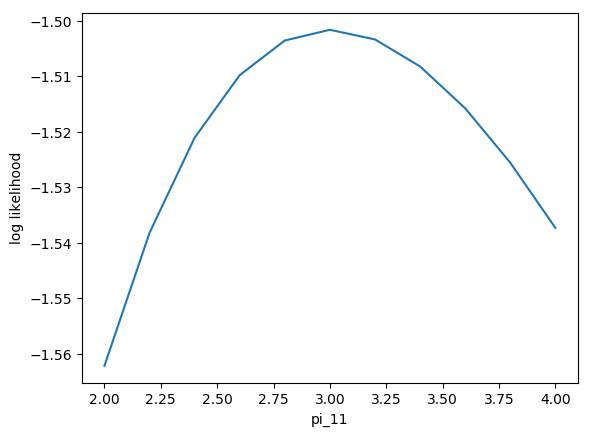

In [25]:
x = collect(2:.2:4)
y = zeros(size(x)[1])


mix = [.5 ; .3; .2]
payoffs = [ [3 -1 ; 0 0], [1 -3 ; 0 0] ]
T =2

actual_pr = calc_pr(payoffs,mix,T=T;)

for i=1:size(x)[1]
    payoffs = [ [x[i] -1 ; 0 0], [1 -3 ; 0 0] ]
    pr_test = calc_pr(payoffs, mix,T=T)
    y[i] = sum(log.(pr_test) .* actual_pr)
end

plot(x,y)
xlabel("pi_11")
ylabel("log likelihood")
savefig("numer1")

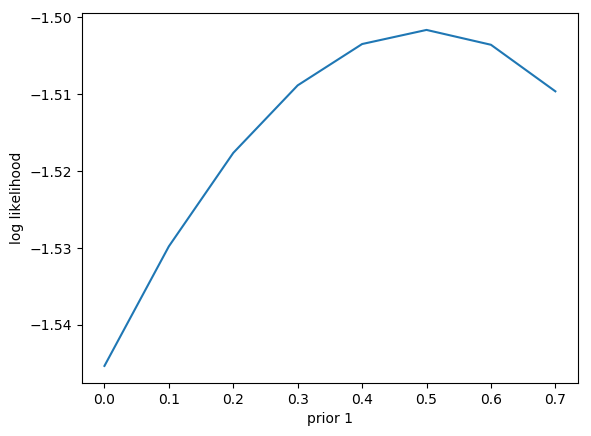

In [27]:
x = collect(0:0.1:.7)
y = zeros(size(x)[1])


mix = [.5 ; .3; .2]
payoffs = [ [3 -1 ; 0 0], [1 -3 ; 0 0] ]
T =2

mix = [.5 ; .3; .2]
payoffs = [ [3 -1 ; 0 0], [1 -3 ; 0 0] ]
T =2

actual_pr = calc_pr(payoffs,mix,T=T;)

for i=1:size(x)[1]
    payoffs = [ [3 -1 ; 0 0], [1 -3 ; 0 0] ]
    pr_test = calc_pr(payoffs, [x[i] , .3,  1-x[i]-.3],T=T)
    y[i] = sum(log.(pr_test) .* actual_pr)
end

plot(x,y)
xlabel("prior 1")
ylabel("log likelihood")
savefig("numer2")